<a href="https://colab.research.google.com/github/RegisKonan/FinalProject/blob/main/regis_djaha_NN_Deep_Learning__Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(1)
from IPython import display

In [ ]:
path= '/content/diabetes.csv'
data= pd.read_csv(path)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
def scale(x):
  """
  Parameters
  -------
    x: dataframe

  Returns
  -------
    x_scaled: dataframe
  
  """
  x_scaled= (x-x.mean())/x.std()
  return x_scaled

In [ ]:
data.iloc[:,:-1]= scale(data)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639530,0.847771,0.149543,0.906679,-0.692439,0.203880,0.468187,1.425067,1
1,-0.844335,-1.122665,-0.160441,0.530556,-0.692439,-0.683976,-0.364823,-0.190548,0
2,1.233077,1.942458,-0.263769,-1.287373,-0.692439,-1.102537,0.604004,-0.105515,1
3,-0.844335,-0.997558,-0.160441,0.154433,0.123221,-0.493721,-0.920163,-1.040871,0
4,-1.141108,0.503727,-1.503707,0.906679,0.765337,1.408828,5.481337,-0.020483,1


In [ ]:
def split_data(df, train_size=0.8):
  # ADD YOUR CODES
  # shuffle the data before splitting it
  
  #print(Y.shape)
  data=np.array(df)
  #Y=Y.reshape((Y.shape[0],1))
  #Y=data[:,-1]
  X=data[:,:-1]
  #data=np.hstack((X,Y))
  
  data1=np.take(data,np.random.permutation(data.shape[0]),axis=0,out=data)

  size=int(train_size*X.shape[0])
  #print(np.shape(data1))
  X_train=data1[:size,:-1]
  X_test=data1[size:,:-1]
  Y_train=data1[:size,-1]
  Y_test=data1[size:, -1]

  return X_train, X_test, Y_train, Y_test

In [ ]:
x_train, x_test, y_train, y_test= split_data(data) 
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((614, 8), (614,), (154, 8), (154,))

In [ ]:
# x_train, x_test, y_train, y_test= split_data(data) 
# x_train.shape, y_train.shape, x_test.shape, y_test.shape

In [ ]:
def sigmoid(x):
  """
  Parameters
  ----------
    x: an array

  return
  ------

    y: 1/(1+exp(-x))

      a list of value between 0 and 1
  """
  y=1/(1+np.exp(-x))
  return y

In [ ]:
def dsigmoid(x):
  """
  Parameters
  ----------
    x: an array

  return
  ------

    y: sigmoid(x)*(1- sigmoid(x))

      a list of value of the derivative of sigmoid
  """
  y=sigmoid(x)*(1-sigmoid(x))
  return y

In [ ]:
def cross_entropy(y,y_pred):
  """
  Parameters
  ----------
    y: an array
    y_pred: array

  return
  ------
   : float
  """
  t= y*np.log(y_pred)
  s =(1-y)*np.log(1-y_pred)
  loss=-1*np.mean(t+s)
  return loss

In [ ]:
def forward_pass(x, w1, b1, w2, b2):
  """
  Parameters
  ---------
    x: an array of N rows
    w1: an array of shape (hidden_dim, input_dim)
    b1: an array of shape (hidden_dim, 1). Bias vector
    w2: an array of shape (output_dim, hidden_dim)
    b2: an array of shape (1, 1)
  
  Return
  ------
    z1: an array of shape (N, hidden_dim)
    a1: an array of shape (N, hidden_dim)
    z2: an array of shape (N, output_dim)
    a2: an array of shape (N, output_dim)
  """
  #z1= w1@x.T+b1
  z1= w1@x.T+b1
  a1= sigmoid(z1)

  z2= w2@a1+b2
  a2= sigmoid(z2)


  return z1, a1, z2, a2

In [ ]:
def backwardpass(x,y, w1, b1, w2, b2):
  """
  Parameters
  ---------
    x:  an array of N rows
    y:  an array of N rows
    w1: an array of shape (hidden_dim, input_dim)
    b1: an array of shape (hidden_dim, 1). Bias vector
    w2: an array of shape (output_dim, hidden_dim)
    b2: an array of shape (1, 1)
  
  Return
  ------
    dw1: an array of shape (hidden_dim, input_dim)
    db1: an array of shape (hidden_dim, 1). Bias vector
    dw2: an array of shape (output_dim, hidden_dim)
    db2: an array of shape (1, 1)
  """
  
  # Forward pass
  z1, a1, z2, a2=forward_pass(x, w1, b1, w2, b2)
  m= len(y)
  #Backward

  dw1= ((1/m)*((w2.T@(a2-y)*a1*(1-a1))@x))
  db1=np.mean(w2.T@(a2-y)*a1*(1-a1))





  dw2= ((1/m)*((a2-y)@a1.T))
  db2=(1/m)*np.sum((a2-y),axis=1)

  return dw1, db1, dw2, db2

In [ ]:
def train(x,y, x_val, y_val):
  """
  Parameters
  ---------
    x:  an array of N rows
    y:  an array of N rows
    w1: an array of shape (hidden_dim, input_dim)
    b1: an array of shape (hidden_dim, 1). Bias vector
    w2: an array of shape (output_dim, hidden_dim)
    b2: an array of shape (1, 1)
  
  Return
  ------
    cost: an array of shape (num_epochs, )
    cost_test: an array of shape (num_epochs, ).
    w1: an array of shape (hidden_dim, input_dim)
    b1: an array of shape (hidden_dim, 1). Bias vector
    w2: an array of shape (output_dim, hidden_dim)
    b2: an array of shape (1, 1)
  """
  input_dim= x.shape[1] # number of features
  hidden_dim= 16 # number of units in the hideen layer
  output_dim= 1 # number of units in the output layer
  w1 = np.random.rand(hidden_dim,input_dim)*0.01 # (hidden_dim, input_dim)
  b1 = np.random.rand(hidden_dim,1) # (hidden_dim, 1)

  w2 = np.random.rand( output_dim,hidden_dim)*0.01 # (output_dim, hidden_dim)
  b2 = np.random.rand(output_dim,1) # (output_dim, 1)
  lr = 0.001
  num_epochs = 1000
  

  cost =[]
  cost_test= []

  for i in range(num_epochs):
      # Backward Pass
      dw1, db1, dw2, db2=backwardpass(x,y, w1, b1, w2, b2)

      # Update weights
      w1 = w1-lr *dw1
      b1= b1-lr*db1


      w2 = w2-lr *dw2
      b2= b2-lr*db2

      # Get the Train Loss
      # apply forward to get z1, a1, z2 and a2
      z1, a1, z2, a2= forward_pass(x, w1, b1, w2, b2)
      

      #Compute the loss
      loss_tain = cross_entropy(y,a2)
      cost.append(loss_tain)


      # Get the Test Loss
      # apply forward to get z1, a1, z2 and a2 using x_val
      z1, a1, z2, a2= forward_pass(x_val, w1, b1, w2, b2)
      loss_test = cross_entropy(y_val,a2)
      cost_test.append(loss_test)
  
  return cost, cost_test, w1, b1, w2, b2

In [ ]:
def accuracy(y, y_pred):
  acc= np.mean(y == y_pred)
  return acc*100

In [ ]:
threshold= 0.5
def get_class(x):
  _,_,_,proba= forward_pass(x, w1, b1, w2, b2) # Get probability of x
  proba= proba.squeeze(0)
  result= [1 if i> threshold else 0 for i in proba] # Convert proba to 0 or 1. hint: list comprehension
  return np.array(result), proba

In [ ]:
cost, cost_test, w1, b1, w2, b2= train(x_train,y_train, x_test, y_test)

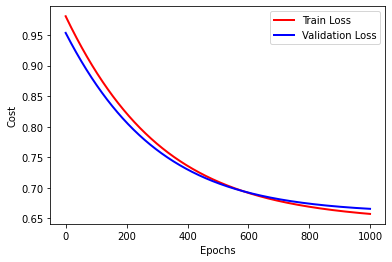

In [ ]:
def plot(cost, cost_test):
  plt.xlabel('Epochs')
  plt.ylabel('Cost')
  plt.plot(np.arange(len(cost)), cost, 'r', linewidth = "2", label= 'Train Loss')
  plt.plot(np.arange(len(cost_test)), cost_test, 'b', linewidth = "2", label= 'Validation Loss')
  plt.legend()
  plt.show()
  
plot(cost, cost_test)

In [ ]:
y_pred, y_proba= get_class(x_test)

In [ ]:
accuracy(y_test, y_pred)

62.98701298701299

# NN Class

In [ ]:
# BGD
class NN:
  def __init__(self, x_test, y_test, size, num_epochs= 1000, lr= 0.001, threshold= 0.5):
    self.num_epochs= num_epochs
    self.lr= lr
    self.threshold= threshold
    self.cost_train= None
    self.size= size
    self.x_test= x_test
    self.y_test= y_test
    self.params= self.weight_initialization()

  def sigmoid(self,x):
    return 1/(1+np.exp(-self.x))
  
  def dsigmoid(self,x):
    return sigmoid(x)*(1-sigmoid(self.x))


  def cross_entropy(self,y,y_pred):
    t= y*np.log(y_pred)
    s =(1-y)*np.log(1-y_pred)
    loss=-1*np.mean(t+s)
    return loss
    #loss= ...
    #return loss
  
  def weight_initialization(self):
    input_dim= self.size[0]
    hidden_dim= self.size[1]
    output_dim= self.size[2]


    params = {
            'w1':np.random.rand(hidden_dim,input_dim)*0.01,
            'b1':np.random.rand(hidden_dim,1),
            'w2':np.random.rand(output_dim, hidden_dim)*0.01,
            'b2':np.random.rand(1,1) 
        }

    return params
  def forward_pass(self, x):
    params= self.params
    z1= self.params['w1']@x.T+self.params['b1']
    a1= sigmoid(z1)
    z2= self.params['w2']@a1+self.params['b2']
    a2= sigmoid(z2)
    return z1, a1, z2, a2
    

    # ForwardPass
    #z1, a1, z2, a2=forward_pass(x)
    #return z1, a1, z2, a2
  
  def backward_pass(self, x, y):
    params= self.params
    z1, a1, z2, a2=self.forward_pass(x)
    m= len(y)
  #Backward
    dw1= ((1/m)*((params['w2'].T@(a2-y)*a1*(1-a1))@x))
    db1=np.mean(params['w2'].T@(a2-y)*a1*(1-a1))

    dw2= ((1/m)*((a2-y)@a1.T))
    db2=(1/m)*np.sum((a2-y),axis=1)
    return dw1, db1, dw2, db2

    # Backward
    

    #return dw1, db1, dw2, db2

  def fit(self, x, y):
    self.cost_train = []
    for i in range(self.num_epochs):
      params = self.params
      dw1, db1, dw2, db2 = self.backward_pass(x, y)

      params['w1'] = params['w1'] - self.lr * dw1
      params['b1'] = params['b1'] - self.lr * db1
      params['w2'] = params['w2'] - self.lr * dw2
      params['b2'] = params['b2'] - self.lr * db2

      _, _, _, y_pred = self.forward_pass(x)
      loss = self.cross_entropy(y, y_pred)
      self.cost_train.append(loss)

    return params['w1'], params['b1'], params['w2'], params['b2']
    
  
  def get_class(self, x):
    w1, b1, w2, b2= self.params['w1'], self.params['b1'], self.params['w2'], self.params['b2']
    _,_,_,proba= self.forward_pass(x) 
    proba= proba.squeeze(0)
    result= [1 if i> threshold else 0 for i in proba] # Convert proba to 0 or 1. hint: list comprehension
    return np.array(result), proba

  def accuracy(self, y,y_pred):
    acc= np.mean(y == y_pred)
    return acc*100
    #return ...
  def plot(self):
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.plot(np.arange(len(self.cost_train)), self.cost_train, 'r', linewidth = "2", label= 'Train Loss')
    plt.legend()
    plt.show()

In [ ]:
size= [x_train.shape[1], 16, 1]
model= NN(x_test, y_test, size, num_epochs= 2000, lr= 0.001)

In [ ]:
model.fit(x_train,y_train)

(array([[ 5.48323241e-03, -5.51868050e-03,  2.62411608e-03,
          5.24431985e-03,  5.77248555e-03,  3.08255082e-03,
         -2.45661220e-03, -3.44404784e-03],
        [ 3.84177307e-03,  1.24066934e-03,  3.70686793e-03,
          8.16716800e-03,  6.44795244e-03,  1.57752681e-03,
         -1.19328609e-03,  1.94476098e-03],
        [ 2.13375471e-03, -7.60616746e-03,  2.46326770e-03,
          7.31734988e-03, -1.97762694e-03, -4.50165765e-03,
          1.34901234e-03,  1.70538583e-03],
        [ 4.95051656e-03, -2.56954521e-03,  3.27319901e-03,
          7.01525323e-03,  5.25366079e-03, -2.41667668e-03,
         -6.66731386e-04,  2.12693413e-03],
        [ 2.30597188e-03, -8.35669551e-03,  1.73960131e-03,
          3.95639084e-03,  6.65017480e-03,  3.49793172e-03,
         -1.04620377e-03,  1.03976401e-03],
        [-2.08773412e-03, -1.10023588e-03, -3.85606005e-04,
         -1.25014342e-03, -1.93314036e-03, -3.14921609e-03,
          6.12539316e-03, -3.51485340e-03],
        [-8.5957

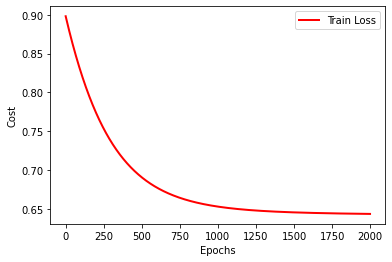

In [ ]:
model.plot()

In [ ]:
y_pred= model.get_class(x_test)

In [ ]:
model.accuracy(y_pred, y_test)

31.493506493506494